In [1]:
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_task_set_from_txt(file):
    task_set = []
    with open(file, 'r') as txtfile:
        for line in txtfile:
            task = tuple(map(int, line.strip()[1:-1].split(', ')))
            task_set.append(task)
    return task_set

In [3]:
def readap(file):
    task_set = []
    with open(file, 'r') as txtfile:
        for line in txtfile:
            task = tuple(map(int, line.strip()[1:-1].split(', ')))
            task_set.append(task)
    return task_set
    

In [4]:
task_set = read_task_set_from_txt("task_set.txt")
data = task_set
df = pd.DataFrame(data, columns=['id', 'execution', 'arrival', 'period', 'dead'])
df = df.drop(columns=['dead'])
ind=len(df)
deff_sever={'id':ind+1,'execution':20,'arrival':0,'period':100}
df.loc[ind]=deff_sever
df['rem']=df['execution']
df['nextdead']=df['period']
df['budget'] = df['execution']
df

,id,execution,arrival,period,rem,nextdead,budget
0,1,13,0,413,13,413,13
1,2,18,0,304,18,304,18
2,3,12,0,474,12,474,12
3,4,13,0,161,13,161,13
4,5,12,0,324,12,324,12
5,6,22,0,162,22,162,22
6,7,13,0,499,13,499,13
7,8,15,0,380,15,380,15
8,9,19,0,327,19,327,19
9,10,13,0,139,13,139,13


In [5]:
task_setap = readap("APtask_set.txt")
data = task_setap
dfap = pd.DataFrame(data, columns=['id','execution','arrival'])
apt=[]

dfap.sort_values('arrival',inplace=True)


In [6]:
sc=[]
ap=[]

In [7]:
bandwidth = 10  # Define the constant bandwidth

apin = 0
for i in range(300):
    task = df[(df["arrival"] <= i) & (df["rem"] > 0)]
    aptask = dfap[(dfap['arrival'] <= i) & (dfap['execution'] > 0)]
    
    if len(task) > 0:
        nexttask = task.sort_values('rem', ascending=False).index[0]  
        if df.loc[nexttask, 'id'] == ind + 1:
            if len(aptask) > 0 and apin < len(dfap):
                nextap = dfap.index[apin]
                min_exec = min(df.loc[nexttask, "rem"], bandwidth)
                df.loc[nexttask, "rem"] -= min_exec
                dfap.loc[nextap, 'execution'] -= min_exec
                if dfap.loc[nextap, 'execution'] == 0:
                    apin += 1

                if ap and i > 0 and ap[-1]['id'] == dfap.loc[nextap, "id"] and ap[-1]['end time'] == i:
                    ap[-1]['end time'] += 1
                    ap[-1]['total time'] += 1
                else:
                    dict = {'id': dfap.loc[nextap, "id"], 'start time': i, 'end time': i + 1, 'total time': 1}
                    ap.append(dict)

                if sc and i > 0 and sc[-1]['id'] == df.loc[nexttask, "id"] and sc[-1]['end time'] == i:
                    sc[-1]['end time'] += 1
                    sc[-1]['total time'] += 1
                else:
                    dict = {'id': df.loc[nexttask, "id"], 'start time': i, 'end time': i + 1, 'total time': 1}
                    sc.append(dict)
        else:
            df.loc[nexttask, "rem"] -= 1.0
            if sc and i > 0 and sc[-1]['id'] == df.loc[nexttask, "id"] and sc[-1]['end time'] == i:
                sc[-1]['end time'] += 1
                sc[-1]['total time'] += 1
            else:
                dict = {'id': df.loc[nexttask, "id"], 'start time': i, 'end time': i + 1, 'total time': 1}
                sc.append(dict)

    arrived = df[(i + 1) % df['period'] == 0].index
    df.loc[arrived, 'rem'] = df.loc[arrived, 'execution']
    df.loc[arrived, 'nextdead'] = df.loc[arrived, 'nextdead'] + df.loc[arrived, 'period']


In [8]:
sc1=pd.DataFrame(sc)
sc1

,id,start time,end time,total time
0,13,0,5,5
1,15,5,6,1
2,13,6,7,1
3,15,7,8,1
4,13,8,9,1
...,...,...,...,...
256,13,275,276,1
257,14,276,277,1
258,15,277,278,1
259,10,278,282,4


In [9]:
ap1=pd.DataFrame(ap)
ap1

,id,start time,end time,total time
0,2,21,22,1
1,2,100,101,1
2,2,111,112,1
3,2,200,202,2


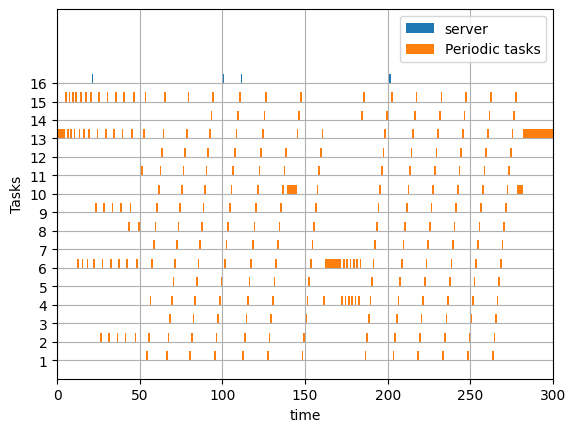

In [10]:
import matplotlib.pyplot as plt

fig, gnt = plt.subplots()
gnt.set_ylim(0, 10*(ind+5))
gnt.set_xlim(0, 300)
gnt.set_xlabel('time')
gnt.set_ylabel('Tasks')
blue_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:blue", edgecolor='none')
orange_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:orange", edgecolor='none')
tick=10
tc=[]
lab=[]
for i in df['id']:
    tc.append(tick)
    lab.append(i)
    tick+=10

gnt.set_yticks(tc)
gnt.set_yticklabels(lab)
gnt.grid(True)

for item in sc:
    if(item['id']==ind+1): 
        gnt.broken_barh([(item['start time'], item['end time']-item['start time'])], (10*item['id'], 5), facecolors =('tab:blue'))
    else: 
        gnt.broken_barh([(item['start time'], item['end time']-item['start time'])], (10*item['id'], 5), facecolors =('tab:orange'))
gnt.legend([blue_patch, orange_patch], [ 'server','Periodic tasks'], loc='upper right')

plt.show()

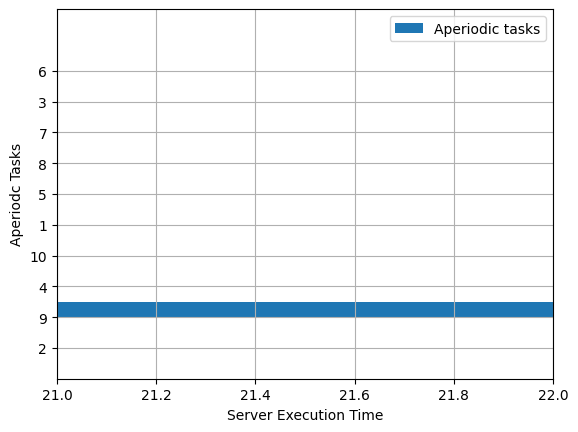

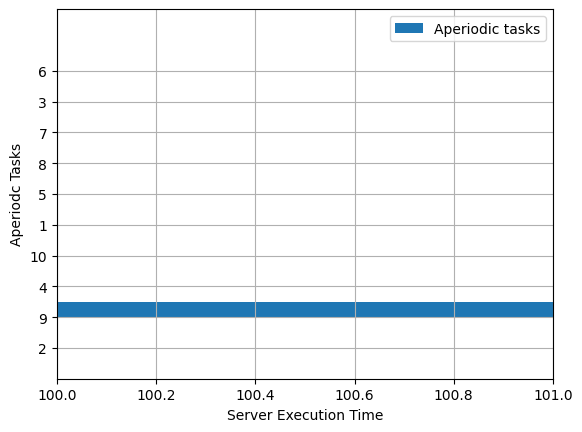

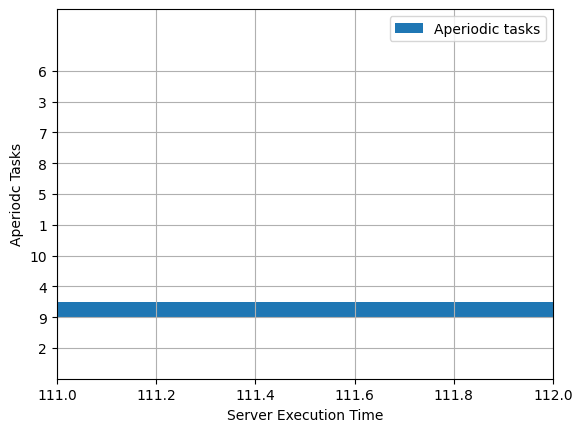

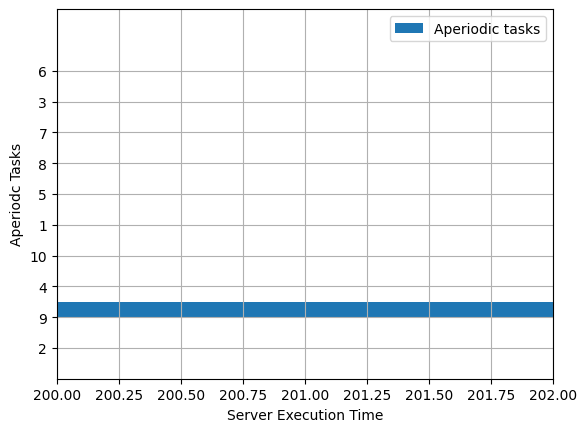

In [11]:
import matplotlib.pyplot as plt
for i in sc:
    if i['id'] == ind + 1: 
        fig, gnt = plt.subplots()
        gnt.set_ylim(0, 10 * (len(dfap) + 2))
        gnt.set_xlim(i['start time'], i['end time'])
        gnt.set_xlabel('Server Execution Time')
        gnt.set_ylabel('Aperiodc Tasks')
        tick = 10
        tc = []
        lab = []
        for j in dfap['id']:
            tc.append(tick)
            lab.append(j)
            tick += 10
        gnt.set_yticks(tc)
        gnt.set_yticklabels(lab)
        gnt.grid(True)
        blue_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:blue", edgecolor='none')
        gnt.legend([blue_patch], ['Aperiodic tasks'], loc='upper right')
        for item in ap:
            if i['start time'] <= item['start time'] and item['end time'] <= i['end time']:
                gnt.broken_barh([(item['start time'], item['end time'] - item['start time'])],
                                (10 * item['id'], 5), facecolors=('tab:blue'))
plt.show()
